**Data Wrangling**

Para esta entrega se reemplazan los valores nulos de "Edad", "Peso" y "Altura" con el método el "forward fill" ("ffill"), de forma que los valores no nulos se copian "hacia adelante" siempre que se encuentren valores nulos. 

El análisis de los valores atípicos y su tratamiento así como el abordaje el desbalance de datos se hará posteriormente.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)
%matplotlib inline
import seaborn as sb
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
mpl.rcParams['figure.dpi'] = 400
import graphviz 
from google.colab import drive
import os 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
sns.set_style('whitegrid')
drive.mount ('/content/gdrive') 
from statistics import mode

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


**EDA**

In [3]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [4]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


In [5]:
df_atletas.shape

(271116, 15)

División del dataframe original en 2 subconjuntos en función del género de los atletas

In [6]:
df_M=df_atletas[df_atletas.Sex == "F" ] # dataframe para atletas Mujeres
df_H=df_atletas[df_atletas.Sex == "M" ] # dataframe para atletas Hombres

**MUJERES EN LOS JUEGOS OLÍMPICOS**

In [7]:
df_M.shape

(74522, 15)

In [8]:
df_M.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
print(df_M.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74098 non-null  float64
 4   Height  67378 non-null  float64
 5   Weight  66771 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   11253 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB
None


**1 - Limpieza de Datos**

Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas.

1) En la columna "Medal" se reemplazan los valores NA con la expresión "sin medalla"

In [10]:
x = df_M["Medal"]

df_M["Medal"].fillna('sin medalla', inplace = True)

df_M["Medal"].replace([0], 'sin medalla')

4         sin medalla
5         sin medalla
6         sin medalla
7         sin medalla
8         sin medalla
             ...     
271080         Bronze
271099    sin medalla
271102         Bronze
271103         Silver
271110    sin medalla
Name: Medal, Length: 74522, dtype: object

 2) Se completan los valores nulos de "Age", "Height" y "Weight" con el método "ffill"

In [11]:

df_M_1=df_M.fillna(axis = 0, method = "ffill") # método "ffill"


In [12]:
df_M_1

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,sin medalla
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",sin medalla
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [13]:
df_M_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74522 non-null  float64
 4   Height  74522 non-null  float64
 5   Weight  74522 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   74522 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB


**2 - Análisis de Medallas**

**Visualización de la proporción de cada color de medalla**

In [14]:
Medallas_por_Color=df_M_1[['Medal','ID']].groupby(by='Medal').count()
Medallas_por_Color

,ID
Medal,
Bronze,3771
Gold,3747
Silver,3735
sin medalla,63269


In [15]:
Medallas_por_Color.index

Index(['Bronze', 'Gold', 'Silver', 'sin medalla'], dtype='object', name='Medal')

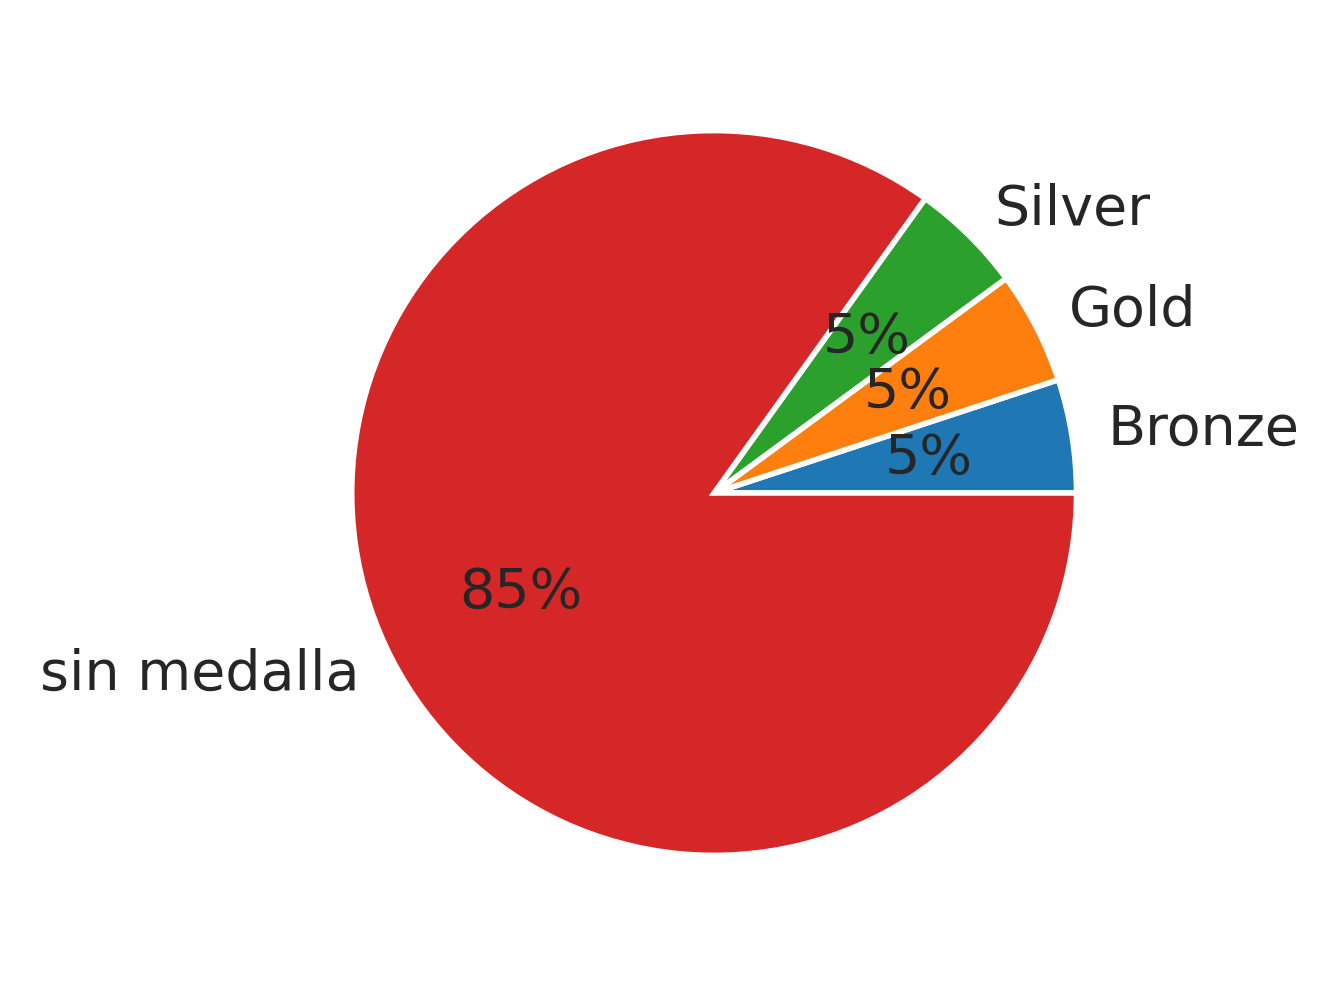

In [16]:
fig,ax = plt.subplots(figsize =(6, 3))
plt.pie(Medallas_por_Color.ID, labels=Medallas_por_Color.index,autopct = '%0.0f%%')
plt.show()

Se visualiza que hay un **desbalance en los datos**. Donde la categoría "sin medalla" supera ampliamente al resto de las categorías ("Gold", "Silver" y "Bronze")

**Segmentación el Dataframe df_M por color de Medalla para visualizar el comportamiento de la variable "Medal" en función de otras características**

In [17]:
df_M_Oro=df_M_1[df_M_1.Medal == "Gold" ] # dataframe para atletas Mujeres con medallas de oro
df_M_Plata=df_M_1[df_M_1.Medal == "Silver" ] # dataframe para atletas Mujeres con medallas de plata
df_M_Bronce=df_M_1[df_M_1.Medal == "Bronze" ] # dataframe para atletas Mujeres con medallas de bronce
df_M_Sin_M=df_M_1[df_M_1.Medal == "sin medalla" ] # dataframe para atletas Mujeres sin medallas

**3 - Análisis de la Edad de las Atletas**

**Distribución de las medallas según la edad de las ateltas**

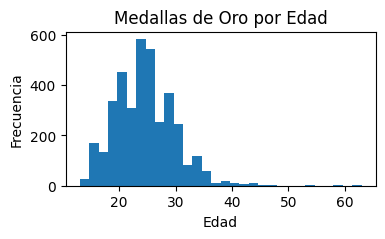

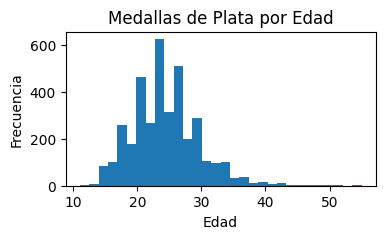

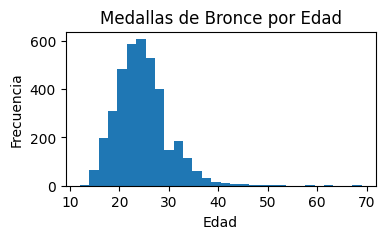

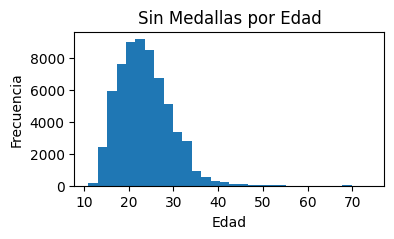

In [18]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Edad')
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Edad')

plt.show()

**a - Oro**









In [19]:
df_M_Oro.Age.describe() # Valores Estadísticos

count    3747.000000
mean       24.378436
std         5.223805
min        13.000000
25%        21.000000
50%        24.000000
75%        27.500000
max        63.000000
Name: Age, dtype: float64

In [20]:
mode(df_M_Oro.Age) # Moda

22.0

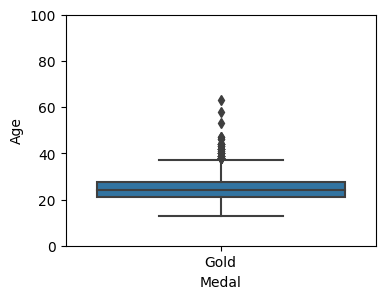

In [21]:
# Valores Atípicos 
var = 'Age'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

**b - Plata**

In [31]:
df_M_Plata.Age.describe() # Valores Estadísticos

count    3735.000000
mean       24.450870
std         5.259234
min        11.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        55.000000
Name: Age, dtype: float64

In [32]:
mode(df_M_Plata.Age) # Moda

23.0

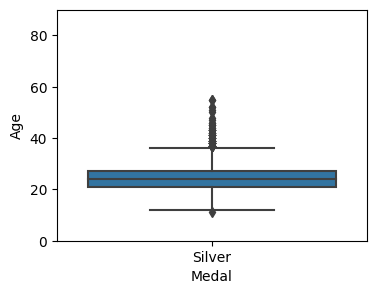

In [33]:
#  Valores Atípicos 
var = 'Age'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

**c - Bronce**

In [34]:
df_M_Bronce.Age.describe() # Valores Estadísticos

count    3771.000000
mean       24.705118
std         5.338566
min        12.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        69.000000
Name: Age, dtype: float64

In [35]:
mode(df_M_Bronce.Age) # Moda

25.0

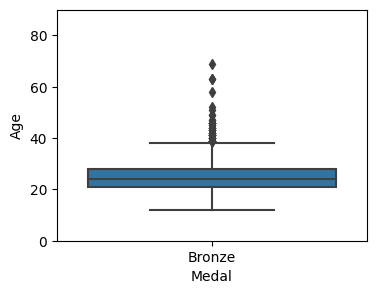

In [36]:
#  Valores Atípicos  
var = 'Age'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

**d - Sin Medalla**

In [37]:
df_M_Sin_M.Age.describe() # Valores Estadísticos 

count    63269.000000
mean        23.597338
std          5.868816
min         11.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         74.000000
Name: Age, dtype: float64

In [38]:
mode(df_M_Sin_M.Age) # Moda

21.0

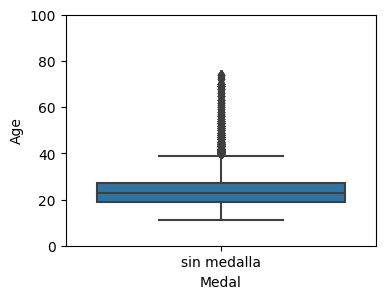

In [39]:
# Valores Atípicos 
var = 'Age'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

**3 - Análisis de la Altura de las Atletas**

**Distribución de las medallas según la altura de las atletas**

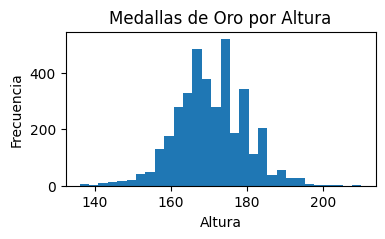

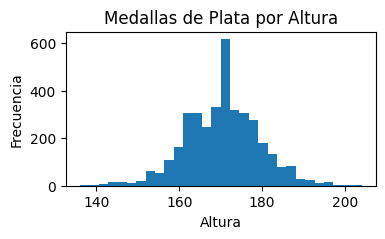

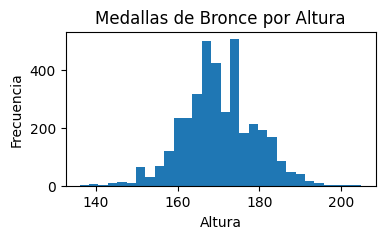

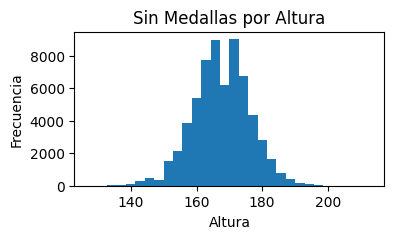

In [40]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Altura')
plt.show()

**a - Oro**

In [41]:
df_M_Oro.Height.describe() # Valores Estadísticos

count    3747.000000
mean      170.636509
std         9.099570
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       210.000000
Name: Height, dtype: float64

In [42]:
mode(df_M_Oro.Height) # Moda

170.0

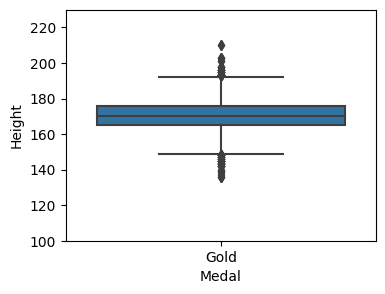

In [43]:
# Valores Atípicos 
var = 'Height'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**b - Plata**

In [44]:
df_M_Plata.Height.describe() # Valores Estadísticos

count    3735.000000
mean      170.428112
std         8.899012
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       204.000000
Name: Height, dtype: float64

In [45]:
mode(df_M_Plata.Height) # Moda

170.0

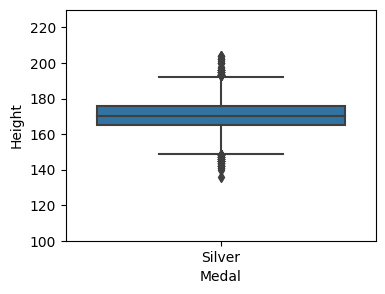

In [46]:
# Valores Atípicos 
var = 'Height'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**c - Bronce**

In [48]:
df_M_Bronce.Height.describe() # Valores Estadísticos

count    3771.000000
mean      170.222222
std         8.891951
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       205.000000
Name: Height, dtype: float64

In [49]:
mode(df_M_Bronce.Height) # Moda

170.0

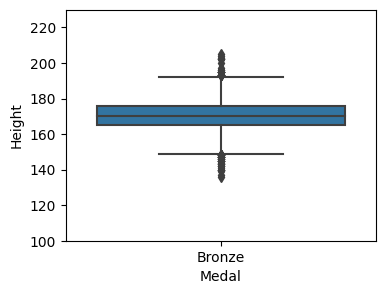

In [50]:
# Valores Atípicos
var = 'Height'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**4 - Sin medalla**

In [51]:
df_M_Sin_M.Height.describe() # Valores Estadísticos

count    63269.000000
mean       167.513285
std          8.652790
min        127.000000
25%        162.000000
50%        168.000000
75%        173.000000
max        213.000000
Name: Height, dtype: float64

In [52]:
mode(df_M_Sin_M.Height) # Moda

170.0

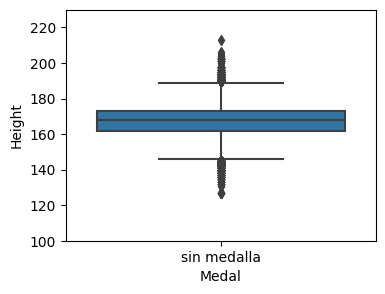

In [53]:
# Valores Atípicos
var = 'Height'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**4 - Análisis del Peso de las Atletas**



**Distribución de las medallas según el peso de las atletas**

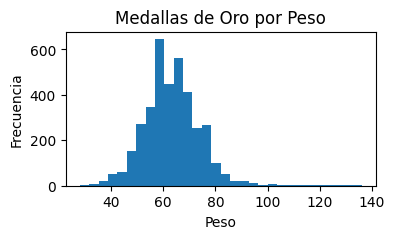

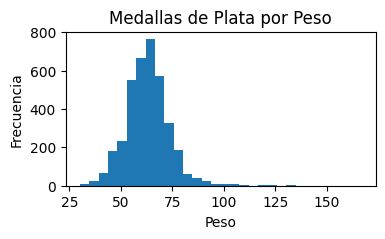

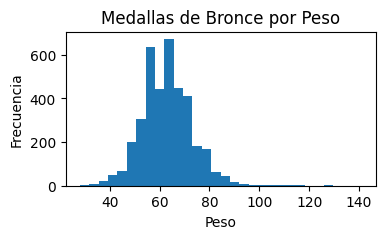

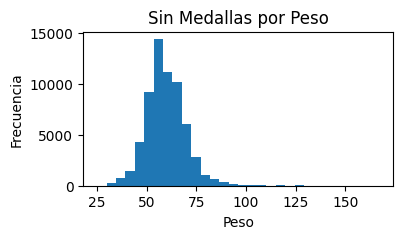

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Peso')
plt.show()

**a - Oro**

In [54]:
df_M_Oro.Weight.describe() # Valores Estadísticos

count    3747.000000
mean       63.311716
std        10.907536
min        28.000000
25%        57.000000
50%        63.000000
75%        70.000000
max       136.000000
Name: Weight, dtype: float64

In [55]:
mode(df_M_Oro.Weight) # Moda

63.0

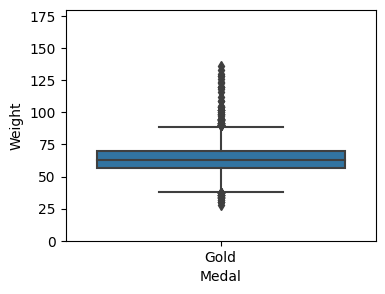

In [56]:
# Valores atípicos
var = 'Weight'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**b - Plata**

In [57]:
df_M_Plata.Weight.describe() # Valores Estadísticos

count    3735.000000
mean       63.079920
std        10.648111
min        30.000000
25%        57.000000
50%        63.000000
75%        69.000000
max       167.000000
Name: Weight, dtype: float64

In [58]:
mode(df_M_Plata.Weight) # Moda

60.0

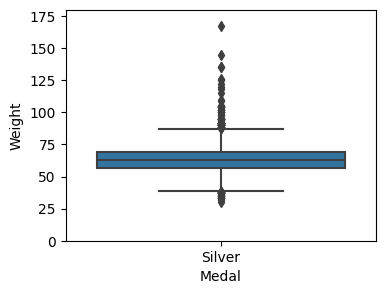

In [59]:
# Valores Atípicos
var = 'Weight'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**c - Bronce**

In [60]:
df_M_Bronce.Weight.describe() # Valores Estadísticos 

count    3771.000000
mean       63.010475
std        10.432356
min        28.000000
25%        56.000000
50%        62.000000
75%        69.000000
max       141.000000
Name: Weight, dtype: float64

In [61]:
mode(df_M_Bronce.Weight) # Moda

63.0

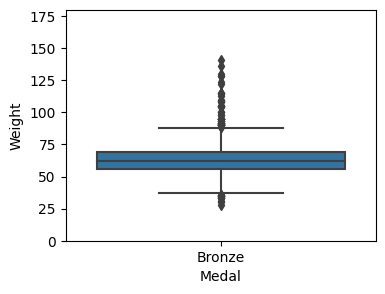

In [62]:
# Valores Atípicos
var = 'Weight'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**d - Sin Medalla**

In [63]:
df_M_Sin_M.Weight.describe() # Valores Estadísticos

count    63269.000000
mean        59.642558
std         10.043836
min         25.000000
25%         53.000000
50%         59.000000
75%         65.000000
max        167.000000
Name: Weight, dtype: float64

In [64]:
mode(df_M_Sin_M.Weight) # Moda

60.0

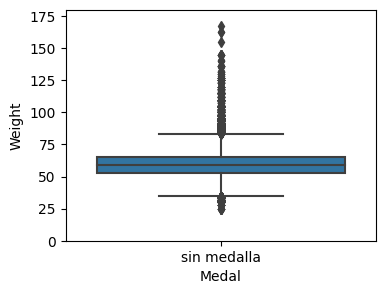

In [65]:
# Valores atípicos
var = 'Weight'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**5 - Análisis de las medallas por NOC que representa a las atletas**

In [66]:
tmp = df_M_1.groupby(['NOC', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

In [67]:
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']
dfSM = df[df['Medal']== 'sin medalla']

In [68]:
traceG = go.Bar(
    x = dfG['NOC'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['NOC'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['NOC'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['NOC'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['NOC'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['NOC'],
   # orientation = 'h'
)

traceSM = go.Bar(
    x = dfSM['NOC'],y = dfSM['ID'],
    name="sin medalla",
    marker=dict(
                color='red',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfSM['NOC'],
   # orientation = 'h'
)
data = [traceG, traceS, traceB, traceSM]
layout = dict(title = 'Medallas por NOC',
          xaxis = dict(title = 'NOC', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Número de medallas'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=1200,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='Medal')

**Nota para el Profesor/Tutor:** Este gráfico fue replicado de un notebook publicado en Kaggle (https://www.kaggle.com/code/gpreda/plotly-tutorial-120-years-of-olympic-games/notebook#Medals) 

Se han adaptado las variables pero no es un desarrollo propio o que se haya visto en el curso. Se agrega porque se considera muy práctico para la interpretación de esta distribución. 

*Claudia Beatriz Perez Lorenzo*

*22/09/2022*